In [31]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

plt.rcParams['figure.figsize']  = (14, 8)
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/JuliaGuerreiro/ICD-Project/main/master.csv')

data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
df = data.drop(['country-year','age'],axis=1).rename(columns={"gdp_per_capita ($)":"GPD", "HDI for year":"HDI"})
anos = df[(df['year'] < 2010) | (df['year'] >= 2016)].index
df.drop(anos,inplace = True)
df

,country,year,sex,suicides_no,population,suicides/100k pop,HDI,gdp_for_year ($),GPD,generation
252,Albania,2010,male,20,241852,8.27,0.722,"11,926,953,259",4359,Silent
253,Albania,2010,male,20,371611,5.38,0.722,"11,926,953,259",4359,Generation X
254,Albania,2010,male,9,179720,5.01,0.722,"11,926,953,259",4359,Generation X
255,Albania,2010,male,2,50767,3.94,0.722,"11,926,953,259",4359,Silent
256,Albania,2010,male,10,279508,3.58,0.722,"11,926,953,259",4359,Millenials
...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,107,3620833,2.96,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,9,348465,2.58,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,60,2762158,2.17,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,44,2631600,1.67,0.675,"63,067,077,179",2309,Generation Z


In [44]:
suicide_per_sex = (df.groupby(['sex','year']).agg({'suicides_no': 'sum'}).reset_index())

sex_f = suicide_per_sex['sex'] == 'female'
sex_m = suicide_per_sex['sex'] == 'male'

df_aux1 = suicide_per_sex[sex_f]
df_aux2 = suicide_per_sex[sex_m]

lista1 = [] 
lista2 = []
lista3 = np.zeros(6, dtype=int)

lista1 = df_aux1['suicides_no']
lista2 = df_aux2['suicides_no']

lista1 = lista1.to_numpy()
lista2 = lista2.to_numpy()
lista3 = lista1+lista2

df_aux1['suicide_total'] = lista3
df_aux1['suicides_men'] = lista2

df_aux1 = df_aux1.rename(columns={'suicides_no': 'suicides_woman'})

df_aux1.set_index('year', inplace = True)
df_aux1 = df_aux1.drop(columns='sex')

gens = [1,1,1,1,1,1,0,0,0,0,0,0]
suicide_per_sex['gen'] = gens

valo1 = [np.nan, np.nan, 47000.0, 1.25]
valo2 = [np.nan, np.nan, 185000.0, -0.25]

suicide_per_sex.loc[12] = valo1
suicide_per_sex.loc[13] = valo2

suicide_per_sex

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,sex,year,suicides_no,gen
0,female,2010.0,54222.0,1.00
1,female,2011.0,54616.0,1.00
2,female,2012.0,53011.0,1.00
3,female,2013.0,51459.0,1.00
4,female,2014.0,51556.0,1.00
5,female,2015.0,47248.0,1.00
6,male,2010.0,184480.0,0.00
7,male,2011.0,181868.0,0.00
8,male,2012.0,177149.0,0.00
9,male,2013.0,171740.0,0.00


## Gênero e Taxa de suicídio

Taxa de suicidio por genero no periodo 2010-2016


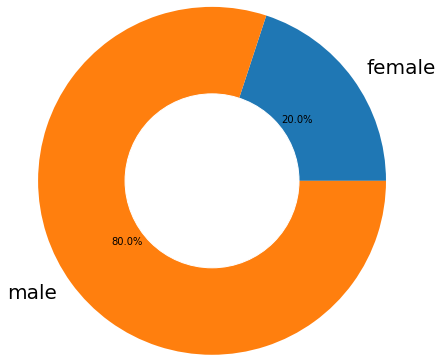

In [4]:
gen_df = df.groupby(['sex']).sum().reset_index()

plt.pie(gen_df.loc[:,'suicides/100k pop'],labels=gen_df.loc[:,'sex'],autopct='%1.1f%%',radius=2)
cir = plt.Circle((0,0),1,color='white',clip_on=False)
ax = plt.gca()
ax.add_artist(cir)
print('Taxa de suicidio por genero no periodo 2010-2016')

plt.show()

Pelo gráfico acima, fica explicíto a disparidade entre as taxas de suicídio para cada gênero dentro do período analisado de 2010 a 2016.

Text(0.5, 0, 'sex')

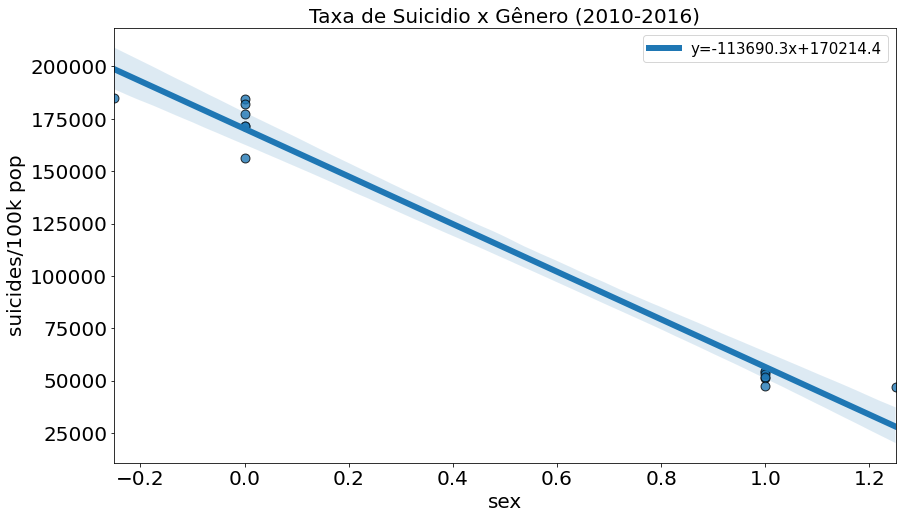

In [46]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(suicide_per_sex['gen'],suicide_per_sex['suicides_no'])
ax = sns.regplot(x='gen', y='suicides_no', data=suicide_per_sex,scatter_kws={"s": 80,'edgecolors':'k'}, line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.legend(fontsize = 15)
plt.title('Taxa de Suicidio x Gênero (2010-2016)',fontsize=20)
plt.ylabel('suicides/100k pop',fontsize=20)
plt.xlabel('sex',fontsize=20)

## Taxa de suicídio em função do IDH

In [5]:
idh_df = df.dropna(subset=['HDI']).reset_index(drop=True)
df2 = idh_df.groupby(['country','year']).agg({'suicides/100k pop':'sum',}).reset_index()
df3 = idh_df.loc[:,['country','year','HDI','GPD']]

lista = list()
for i in range(len(df2)):
    j = 0
    while j < len(df3):
        if (df2.iloc[i,0] == df3.iloc[j,0]) & (df2.iloc[i,1] == df3.iloc[j,1]):
            lista.append(df3.loc[j,'HDI'])
            filtro = df3[(df3['country']==df3.iloc[j,0]) & (df3['year']==df3.iloc[j,1])]
            df3 = df3.drop(filtro.index).reset_index(drop=True)
            j = -1
        j = j + 1

In [6]:
df2['HDI'] = lista
df2

,country,year,suicides/100k pop,HDI
0,Albania,2010,41.66,0.722
1,Antigua and Barbuda,2012,0.00,0.781
2,Antigua and Barbuda,2013,0.00,0.781
3,Antigua and Barbuda,2014,0.00,0.783
4,Argentina,2010,111.24,0.811
...,...,...,...,...
390,Uzbekistan,2010,63.23,0.655
391,Uzbekistan,2011,67.14,0.661
392,Uzbekistan,2012,77.53,0.668
393,Uzbekistan,2013,78.86,0.672


## Regressão Taxa de Suicídio em função do IDH (2010-2014)

Text(0.5, 0, 'HDI')

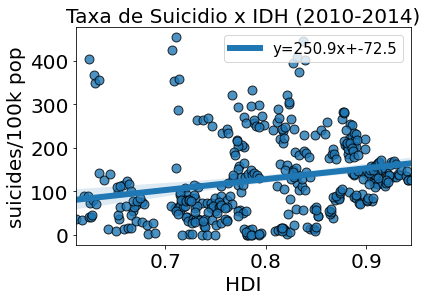

In [7]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df2['HDI'],df2['suicides/100k pop'])
ax = sns.regplot(x='HDI', y='suicides/100k pop', data=df2,scatter_kws={"s": 80,'edgecolors':'k'}, line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.legend(fontsize = 15)
plt.title('Taxa de Suicidio x IDH (2010-2014)',fontsize=20)
plt.ylabel('suicides/100k pop',fontsize=20)
plt.xlabel('HDI',fontsize=20)

In [8]:
print(f'Coeficiente de correlacao R: {r_value:.2f}')
print(f'Coeficiente de determinacao R2: {r_value**2:.2f}')

Coeficiente de correlacao R: 0.23
Coeficiente de determinacao R2: 0.05


Com o coeficiente R-quadrado de 0,05, conclui-se que a regressão linear se ajusta pouco aos dados e a variação do IDH influencia pouco a variação da taxa de suicídio.

## Regressão ano a ano

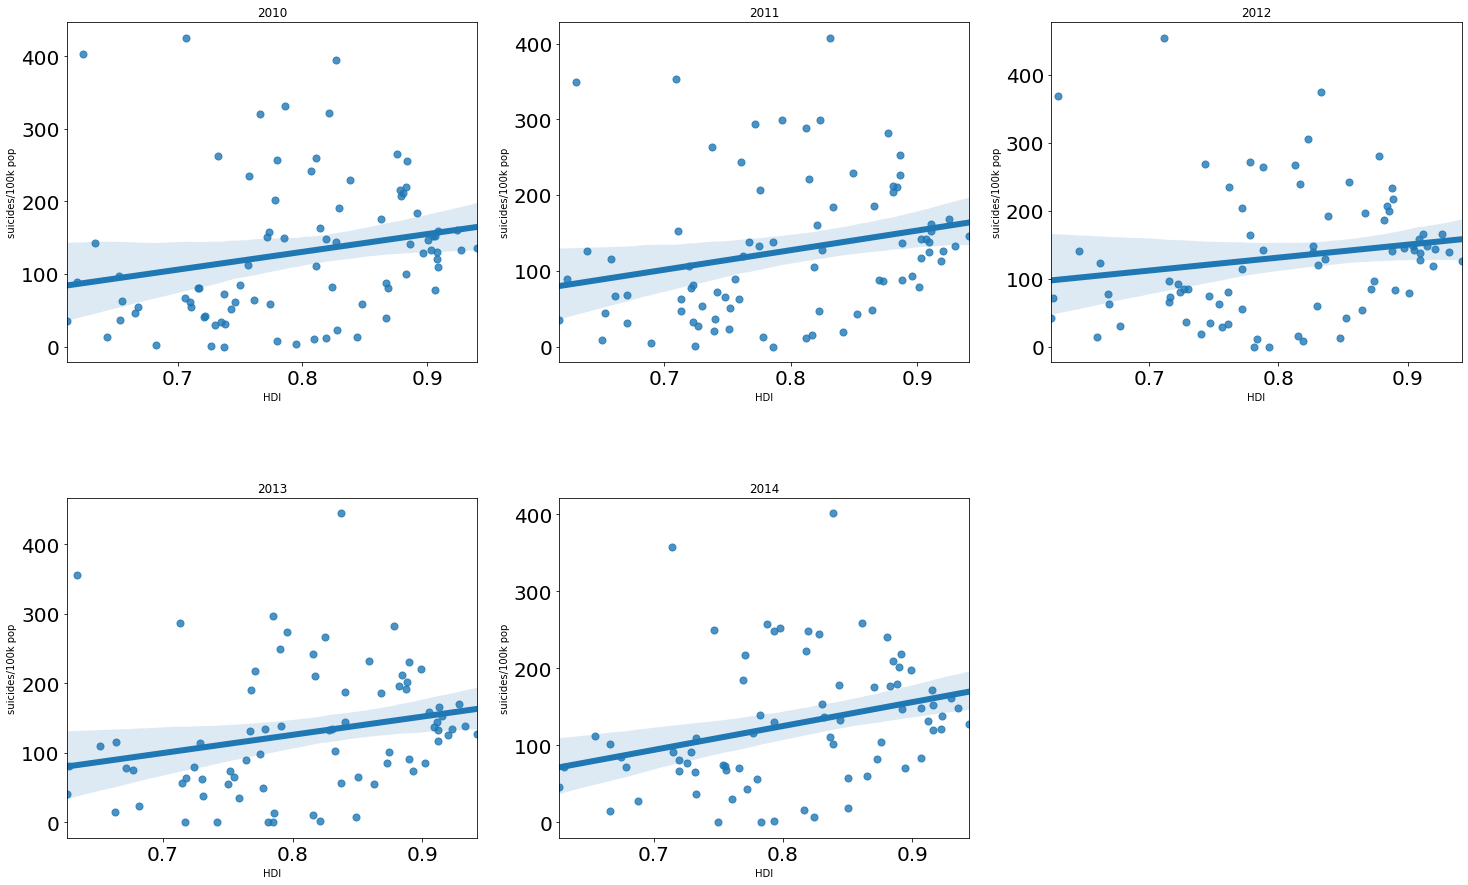

In [9]:
fig = plt.figure(figsize=(25,15))
fig.subplots_adjust(hspace=0.4)

aux = df2['year'].unique()
aux.sort()

for index, ano in enumerate(aux):
    ax = fig.add_subplot(2,3,index+1)
    sns.regplot(x='HDI', y='suicides/100k pop', data=df2[df2['year']==ano],scatter_kws={"s": 50},order=1)
    plt.title(ano)

Acima realizei regressão ano a ano para identificar se haveria alguma variação perceptiva entre os anos. Porém, os gráficos mostram que a dispersão dos dados continua bem semelhante com o passar do tempo, e que a taxa de suicídio tem um leve aumento quanto maior for o IDH.

## Regressão por KNN

In [10]:
X = df2['HDI'].values.reshape(-1, 1)
y = df2['suicides/100k pop'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

score_uni, score_dist = list(),list()
for i in range(1,21):
  for j in ['uniform','distance']:
    knn = KNeighborsRegressor(n_neighbors = i,weights = j)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    R2 = r2_score(y_test, y_pred)

    if j == 'uniform':
      score_uni.append(R2)
    else:
      score_dist.append(R2)

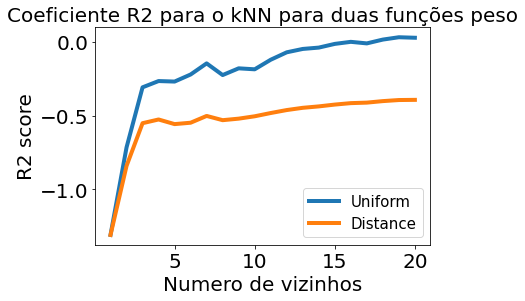

In [11]:
plt.plot(range(1,21), score_uni, label='Uniform')
plt.plot(range(1,21), score_dist, label='Distance')
plt.title('Coeficiente R2 para o kNN para duas funções peso', fontsize=20)
plt.ylabel('R2 score', fontsize=20)
plt.xlabel('Numero de vizinhos',fontsize=20)
plt.legend(fontsize=15)
plt.show()

Para ambas funções de peso e variando o número de vizinhos do kNN, o coeficiente de determinação retornou valores bem baixos, especialmente para poucos vizinhos. Isso demonstra a dificuldade para se realizar a previsão da taxa de suicídio de um país tendo como base apenas o seu IDH, e outros algoritmos mais robustos de aprendizado de máquina necessitariam ser testados.

## Taxa de suicidio com base na renda per capita (GPD)

In [12]:
gpd_df = df.dropna(subset=['GPD']).reset_index(drop=True)
gpd_df2 = gpd_df.groupby(['country','year']).agg({'suicides/100k pop':'sum',}).reset_index()
df3 = gpd_df.loc[:,['country','year','GPD']]

lista = list()
for i in range(len(gpd_df2)):
    j = 0
    while j < len(df3):
        if (gpd_df2.iloc[i,0] == df3.iloc[j,0]) & (gpd_df2.iloc[i,1] == df3.iloc[j,1]):
            lista.append(df3.loc[j,'GPD'])
            filtro = df3[(df3['country']==df3.iloc[j,0]) & (df3['year']==df3.iloc[j,1])]
            df3 = df3.drop(filtro.index).reset_index(drop=True)
            j = -1
        j = j + 1

In [13]:
gpd_df2['GPD'] = lista
gpd_df2.head()

,country,year,suicides/100k pop,GPD
0,Albania,2010,41.66,4359
1,Antigua and Barbuda,2012,0.00,13657
2,Antigua and Barbuda,2013,0.00,13287
3,Antigua and Barbuda,2014,0.00,14093
4,Antigua and Barbuda,2015,15.62,14853


Text(0.5, 0, 'GPD')

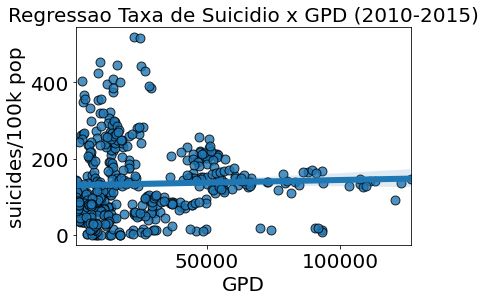

In [14]:
sns.regplot(x='GPD', y='suicides/100k pop', data=gpd_df2,scatter_kws={"s": 80,'edgecolors':'k'})
plt.title('Regressao Taxa de Suicidio x GPD (2010-2015)',fontsize=20)
plt.ylabel('suicides/100k pop',fontsize=20)
plt.xlabel('GPD',fontsize=20)

## Regressão ano a ano

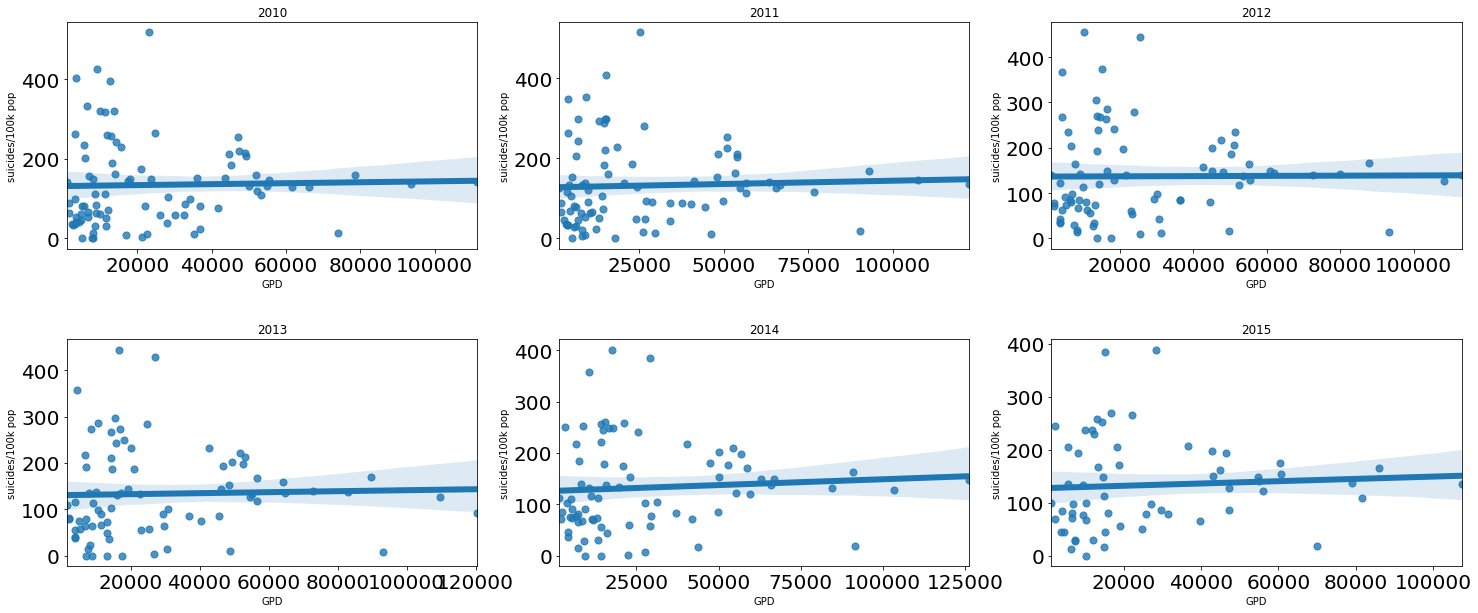

In [15]:
fig = plt.figure(figsize=(25,10))
fig.subplots_adjust(hspace=0.4)

aux = gpd_df2['year'].unique()
aux.sort()

for index, ano in enumerate(aux):
    ax = fig.add_subplot(2,3,index+1)
    sns.regplot(x='GPD', y='suicides/100k pop', data=gpd_df2[gpd_df2['year']==ano],scatter_kws={"s": 50},order=1)
    plt.title(ano)

Os gráficos de regressão linear mostram a baixíssima correlação linear entre a renda per capita e a taxa de suicídio, seja em um ano específico ou durante todo o período.